<a href="https://colab.research.google.com/github/bryantanjy/soil-fertility-fuzzy-logic/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dbceacbb160b315ddb04e1c683de3784d45fb000752648d280d0ecbb1f2f8477
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
#function
nitrogen = ctrl.Antecedent(np.arange(0,101,1), 'nitrogen')
phosphorus = ctrl.Antecedent(np.arange(0,151,1), 'phosphorus')
potassium = ctrl.Antecedent(np.arange(0,1501,1), 'potassium')
soilFertility = ctrl.Consequent(np.arange(0,101,1), 'soilFertility')

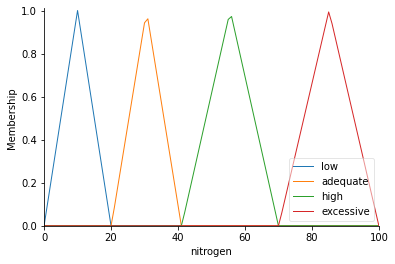

In [ ]:
#create membership function for nitrogen
nitrogen['low'] = fuzz.trimf(nitrogen.universe, [0, 10, 20])
nitrogen['adequate'] = fuzz.trimf(nitrogen.universe, [20.1, 30.6, 41])
nitrogen['high'] = fuzz.trimf(nitrogen.universe, [41.1, 55.6 , 70])
nitrogen['excessive'] = fuzz.trimf(nitrogen.universe, [70.1, 85.1, 100])

nitrogen.view()

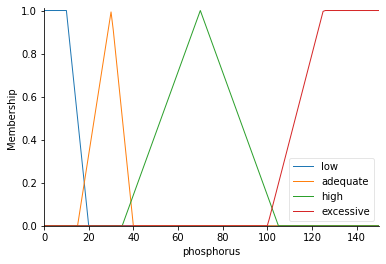

In [ ]:
#create membership function for phosphorus
phosphorus['low'] = fuzz.trapmf(phosphorus.universe, [0, 0, 10, 20])
phosphorus['adequate'] = fuzz.trimf(phosphorus.universe, [15, 30.1, 40])
phosphorus['high'] = fuzz.trimf(phosphorus.universe, [35, 70, 105])
phosphorus['excessive'] = fuzz.trapmf(phosphorus.universe, [100.1, 125.1, 150, 150])

phosphorus.view()

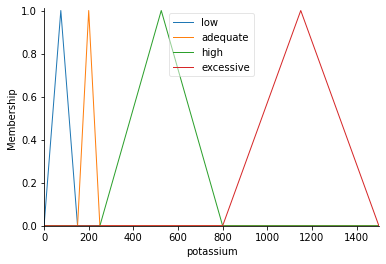

In [ ]:
#create membership function for potassium
potassium['low'] = fuzz.trimf(potassium.universe, [0, 75, 150])
potassium['adequate'] = fuzz.trimf(potassium.universe, [150.1, 200, 250])
potassium['high'] = fuzz.trimf(potassium.universe, [250.1, 525, 800])
potassium['excessive'] = fuzz.trimf(potassium.universe, [800.1, 1150, 1500])

potassium.view()

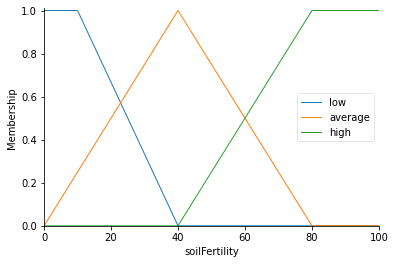

In [ ]:
#create membership function for soil fertility
soilFertility['low'] = fuzz.trapmf(soilFertility.universe, [0, 0, 10, 40])
soilFertility['average'] = fuzz.trimf(soilFertility.universe, [0, 40, 80])
soilFertility['high'] = fuzz.trapmf(soilFertility.universe, [40, 80, 100, 101])

soilFertility.view()

In [ ]:
#create rules
rule1 = ctrl.Rule(nitrogen['excessive'] | phosphorus['excessive'] | potassium['excessive'], soilFertility['high'])
rule2 = ctrl.Rule(nitrogen['excessive'] | phosphorus['excessive'] | potassium['high'], soilFertility['high'])
rule3 = ctrl.Rule(nitrogen['excessive'] | phosphorus['excessive'] | potassium['adequate'], soilFertility['high'])
rule4 = ctrl.Rule(nitrogen['excessive'] | phosphorus['excessive'] | potassium['low'], soilFertility['average'])
rule5 = ctrl.Rule(nitrogen['excessive'] | phosphorus['high'] | potassium['excessive'], soilFertility['high'])
rule6 = ctrl.Rule(nitrogen['excessive'] | phosphorus['high'] | potassium['high'], soilFertility['high'])
rule7 = ctrl.Rule(nitrogen['excessive'] | phosphorus['high'] | potassium['adequate'], soilFertility['high'])
rule8 = ctrl.Rule(nitrogen['excessive'] | phosphorus['high'] | potassium['low'], soilFertility['high'])
rule9 = ctrl.Rule(nitrogen['excessive'] | phosphorus['adequate'] | potassium['excessive'], soilFertility['high'])
rule10 = ctrl.Rule(nitrogen['excessive'] | phosphorus['adequate'] | potassium['high'], soilFertility['average'])
rule11 = ctrl.Rule(nitrogen['excessive'] | phosphorus['adequate'] | potassium['adequate'], soilFertility['average'])
rule12 = ctrl.Rule(nitrogen['excessive'] | phosphorus['adequate'] | potassium['low'], soilFertility['average'])
rule13 = ctrl.Rule(nitrogen['excessive'] | phosphorus['low'] | potassium['excessive'], soilFertility['high'])
rule14 = ctrl.Rule(nitrogen['excessive'] | phosphorus['low'] | potassium['high'], soilFertility['average'])
rule15 = ctrl.Rule(nitrogen['excessive'] | phosphorus['low'] | potassium['adequate'], soilFertility['low'])
rule16 = ctrl.Rule(nitrogen['excessive'] | phosphorus['low'] | potassium['low'], soilFertility['low'])
rule17 = ctrl.Rule(nitrogen['high'] | phosphorus['excessive'] | potassium['excessive'], soilFertility['high'])
rule18 = ctrl.Rule(nitrogen['high'] | phosphorus['excessive'] | potassium['high'], soilFertility['high'])
rule19 = ctrl.Rule(nitrogen['high'] | phosphorus['excessive'] | potassium['adequate'], soilFertility['high'])
rule20 = ctrl.Rule(nitrogen['high'] | phosphorus['excessive'] | potassium['low'], soilFertility['high'])
rule21 = ctrl.Rule(nitrogen['high'] | phosphorus['high'] | potassium['excessive'], soilFertility['average'])
rule22 = ctrl.Rule(nitrogen['high'] | phosphorus['high'] | potassium['high'], soilFertility['average'])
rule23 = ctrl.Rule(nitrogen['high'] | phosphorus['high'] | potassium['adequate'], soilFertility['high'])
rule24 = ctrl.Rule(nitrogen['high'] | phosphorus['high'] | potassium['low'], soilFertility['low'])
rule25 = ctrl.Rule(nitrogen['high'] | phosphorus['adequate'] | potassium['excessive'], soilFertility['average'])
rule26 = ctrl.Rule(nitrogen['high'] | phosphorus['adequate'] | potassium['high'], soilFertility['average'])
rule27 = ctrl.Rule(nitrogen['high'] | phosphorus['adequate'] | potassium['adequate'], soilFertility['low'])
rule28 = ctrl.Rule(nitrogen['high'] | phosphorus['adequate'] | potassium['low'], soilFertility['low'])
rule29 = ctrl.Rule(nitrogen['high'] | phosphorus['low'] | potassium['excessive'], soilFertility['average'])
rule30 = ctrl.Rule(nitrogen['high'] | phosphorus['low'] | potassium['high'], soilFertility['average'])
rule31 = ctrl.Rule(nitrogen['high'] | phosphorus['low'] | potassium['adequate'], soilFertility['low'])
rule32 = ctrl.Rule(nitrogen['high'] | phosphorus['low'] | potassium['low'], soilFertility['average'])
rule33 = ctrl.Rule(nitrogen['adequate'] | phosphorus['excessive'] | potassium['excessive'], soilFertility['average'])
rule34 = ctrl.Rule(nitrogen['adequate'] | phosphorus['excessive'] | potassium['high'], soilFertility['high'])
rule35 = ctrl.Rule(nitrogen['adequate'] | phosphorus['excessive'] | potassium['adequate'], soilFertility['high'])
rule36 = ctrl.Rule(nitrogen['adequate'] | phosphorus['excessive'] | potassium['low'], soilFertility['high'])
rule37 = ctrl.Rule(nitrogen['adequate'] | phosphorus['high'] | potassium['excessive'], soilFertility['average'])
rule38 = ctrl.Rule(nitrogen['adequate'] | phosphorus['high'] | potassium['high'], soilFertility['average'])
rule39 = ctrl.Rule(nitrogen['adequate'] | phosphorus['high'] | potassium['adequate'], soilFertility['high'])
rule40 = ctrl.Rule(nitrogen['adequate'] | phosphorus['high'] | potassium['low'], soilFertility['low'])
rule41 = ctrl.Rule(nitrogen['adequate'] | phosphorus['adequate'] | potassium['excessive'], soilFertility['average'])
rule42 = ctrl.Rule(nitrogen['adequate'] | phosphorus['adequate'] | potassium['high'], soilFertility['average'])
rule43 = ctrl.Rule(nitrogen['adequate'] | phosphorus['adequate'] | potassium['adequate'], soilFertility['average'])
rule44 = ctrl.Rule(nitrogen['adequate'] | phosphorus['adequate'] | potassium['low'], soilFertility['low'])
rule45 = ctrl.Rule(nitrogen['adequate'] | phosphorus['low'] | potassium['excessive'], soilFertility['average'])
rule46 = ctrl.Rule(nitrogen['adequate'] | phosphorus['low'] | potassium['high'], soilFertility['average'])
rule47 = ctrl.Rule(nitrogen['adequate'] | phosphorus['low'] | potassium['adequate'], soilFertility['average'])
rule48 = ctrl.Rule(nitrogen['adequate'] | phosphorus['low'] | potassium['low'], soilFertility['low'])
rule49 = ctrl.Rule(nitrogen['low'] | phosphorus['excessive'] | potassium['excessive'], soilFertility['average'])
rule50 = ctrl.Rule(nitrogen['low'] | phosphorus['excessive'] | potassium['high'], soilFertility['average'])
rule51 = ctrl.Rule(nitrogen['low'] | phosphorus['excessive'] | potassium['adequate'], soilFertility['high'])
rule52 = ctrl.Rule(nitrogen['low'] | phosphorus['excessive'] | potassium['low'], soilFertility['high'])
rule53 = ctrl.Rule(nitrogen['low'] | phosphorus['high'] | potassium['excessive'], soilFertility['average'])
rule54 = ctrl.Rule(nitrogen['low'] | phosphorus['high'] | potassium['high'], soilFertility['average'])
rule55 = ctrl.Rule(nitrogen['low'] | phosphorus['high'] | potassium['adequate'], soilFertility['low'])
rule56 = ctrl.Rule(nitrogen['low'] | phosphorus['high'] | potassium['low'], soilFertility['low'])
rule57 = ctrl.Rule(nitrogen['low'] | phosphorus['adequate'] | potassium['excessive'], soilFertility['average'])
rule58 = ctrl.Rule(nitrogen['low'] | phosphorus['adequate'] | potassium['high'], soilFertility['low'])
rule59 = ctrl.Rule(nitrogen['low'] | phosphorus['adequate'] | potassium['adequate'], soilFertility['low'])
rule60 = ctrl.Rule(nitrogen['low'] | phosphorus['adequate'] | potassium['low'], soilFertility['low'])
rule61 = ctrl.Rule(nitrogen['low'] | phosphorus['low'] | potassium['excessive'], soilFertility['average'])
rule62 = ctrl.Rule(nitrogen['low'] | phosphorus['low'] | potassium['high'], soilFertility['average'])
rule63 = ctrl.Rule(nitrogen['low'] | phosphorus['low'] | potassium['adequate'], soilFertility['low'])
rule64 = ctrl.Rule(nitrogen['low'] | phosphorus['low'] | potassium['low'], soilFertility['low'])

outcome_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,
                                         rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23,
                                         rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34,
                                         rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45,
                                         rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56,
                                         rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64])
outcome = ctrl.ControlSystemSimulation(outcome_ctrl)

50.0


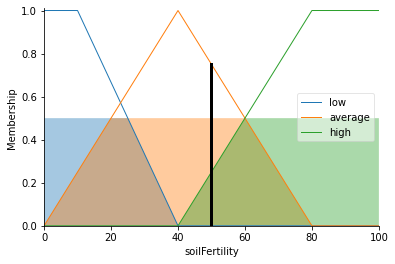

In [ ]:
outcome.input['nitrogen'] = 38
outcome.input['phosphorus'] = 15
outcome.input['potassium'] = 27

outcome.compute()

print(outcome.output['soilFertility'])
soilFertility.view(sim=outcome)